In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import h5py
import os

import tensorflow as tf

In [3]:
logs = pd.read_csv("experiment_test/logs/log.csv")

In [4]:
logs

,epoch,acc,average_class_precision,loss,top_5,val_acc,val_average_class_precision,val_loss,val_top_5
0,0,0.865835,0.811098,0.563057,1.0,0.709564,0.848122,0.826188,1.0
1,1,0.916992,0.854351,0.463704,1.0,0.812719,0.866163,0.668081,1.0
2,2,0.931716,0.873404,0.434315,1.0,0.822233,0.880105,0.659038,1.0
3,3,0.946289,0.885126,0.403950,1.0,0.754882,0.888151,0.909580,1.0
4,4,0.948768,0.889976,0.392853,1.0,0.824487,0.893558,0.693580,1.0
5,5,0.954477,0.896265,0.381273,1.0,0.828993,0.898983,0.683288,1.0
6,6,0.962215,0.901421,0.364591,1.0,0.779419,0.902969,0.927179,1.0
7,7,0.966496,0.904549,0.351083,1.0,0.846520,0.906627,0.658801,1.0
8,8,0.967924,0.908693,0.348690,1.0,0.774662,0.909631,1.000427,1.0
9,9,0.973933,0.910805,0.334689,1.0,0.822734,0.912302,0.827807,1.0


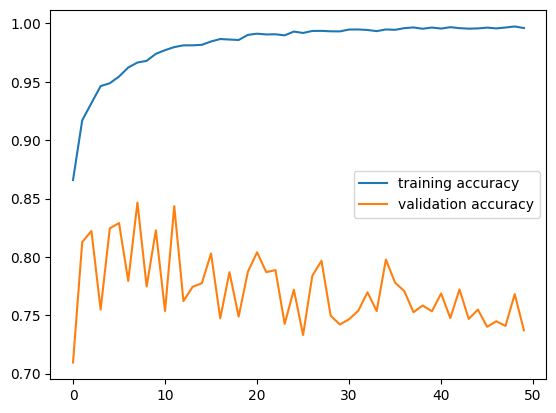

In [5]:
plt.plot(logs["epoch"], logs["acc"], label = "training accuracy")
plt.plot(logs["epoch"], logs["val_acc"], label = "validation accuracy")
plt.legend()

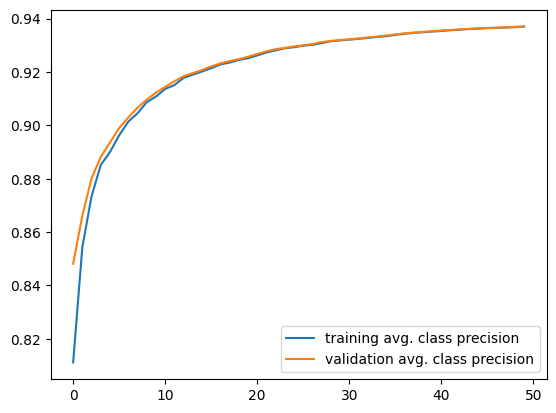

In [6]:
plt.plot(logs["epoch"], logs["average_class_precision"], label = "training avg. class precision")
plt.plot(logs["epoch"], logs["val_average_class_precision"], label = "validation avg. class precision")
plt.legend()

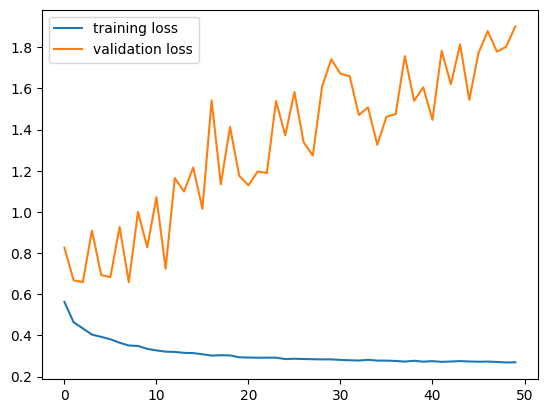

In [7]:
plt.plot(logs["epoch"], logs["loss"], label = "training loss")
plt.plot(logs["epoch"], logs["val_loss"], label = "validation loss")
plt.legend()

In [10]:
filename = "experiment_test/checkpoint/checkpoint_0007.hdf5"

f = h5py.File(filename, "r+")

In [11]:
for key in f.keys():
    if "block7a" in key:
        print(key)


block7a_activation
block7a_bn
block7a_dwconv
block7a_expand_activation
block7a_expand_bn
block7a_expand_conv
block7a_project_bn
block7a_project_conv
block7a_se_excite
block7a_se_expand
block7a_se_reduce
block7a_se_reshape
block7a_se_squeeze


In [13]:
f.close()

In [14]:
len(f.keys())

ValueError: Invalid group (or file) id (invalid group (or file) ID)

In [15]:
f["block6a_dwconv"]['block6a_dwconv_1']['depthwise_kernel:0']

KeyError: 'Unable to synchronously open object (invalid identifier type to function)'

In [12]:
block1a_dwconv = f["block6a_dwconv"]["block6a_dwconv_1"]['depthwise_kernel:0'][()]

In [13]:
block1a_dwconv = block1a_dwconv.reshape((5, 5, 672))

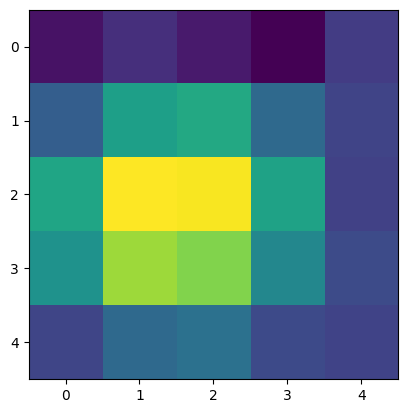

In [14]:
plt.imshow(block1a_dwconv[:, :, 243])

In [ ]:
f.close()

## Class Activation Maps

In [1]:
from deepprofiler.learning.model import DeepProfilerModel
import tensorflow as tf
import json
import deepprofiler
from deepprofiler.learning.training import learn_model
from plugins.crop_generators.sampled_crop_generator import GeneratorClass, SingleImageGeneratorClass
from plugins.models.efficientnet import model_factory
import copy
from deepprofiler.dataset.image_dataset import read_dataset

2024-03-18 15:03:44.479000: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 15:03:44.542772: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-18 15:03:44.542806: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-18 15:03:44.544583: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-18 15:03:44.555941: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 15:03:44.556985: I tensorflow/core/platform/cpu_feature_guard.cc:1

Instructions for updating:
non-resource variables are not supported in the long term
2024-03-18 15:03:54,060 - WARNING - From /home/kel331/.conda/envs/microscopy2/lib/python3.11/site-packages/tensorflow/python/compat/v2_compat.py:108: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


/home/kel331/.conda/envs/microscopy2/lib/python3.11/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
f = open('/n/data1/hms/dbmi/zitnik/lab/users/kel331/microscopyclock/inputs/config/training_profiling.json') 
config = json.load(f)
f.close()

In [3]:
root = "/n/data1/hms/dbmi/zitnik/lab/users/kel331/microscopyclock"
single_cells = "single_cells_preprocessed"
exp= "experiment_test"
dirs = {
        "root": root,
        "locations": root + "/inputs/locations/",  # TODO: use os.path.join()
        "config": root + "/inputs/config/",
        "images": root + "/inputs/images/",
        "metadata": root + "/inputs/metadata/",
        "intensities": root + "/outputs/intensities/",
        "compressed_images": root + "/outputs/compressed/images/",
        "single_cell_set": root + "/outputs/" + single_cells + "/",
        "results": root + "/outputs/" + exp + "/",
        "checkpoints": root + "/outputs/" + exp + "/checkpoint/",
        "logs": root + "/outputs/" + exp + "/logs/",
        "summaries": root + "/outputs/" + exp + "/summaries/",
        "features": root + "/outputs/" + exp + "/features/"
    }
config["paths"] = copy.deepcopy(dirs)

In [4]:
import os
config["paths"]["sc_index"] = os.path.join(config["paths"]["single_cell_set"], 'sc-metadata.csv')

In [5]:
config["paths"]["index"] = config["paths"]["metadata"] + "index.csv"

In [6]:
dset = read_dataset(config, mode='train')

Reading metadata form /n/data1/hms/dbmi/zitnik/lab/users/kel331/microscopyclock/inputs/metadata/index.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Metadata_Plate   63 non-null     int64 
 1   Metadata_Well    63 non-null     object
 2   Metadata_Site    63 non-null     int64 
 3   Hoescht          63 non-null     object
 4   FITC             63 non-null     object
 5   Cy5              63 non-null     object
 6   Label            63 non-null     object
 7   Label_replicate  63 non-null     int64 
dtypes: int64(3), object(5)
memory usage: 4.1+ KB
None
{'old': 0, 'young': 1}


In [7]:
type(tf.keras.layers.Input(2))

keras.src.engine.keras_tensor.KerasTensor

In [8]:
crop_generator = GeneratorClass
val_crop_generator = SingleImageGeneratorClass
model = model_factory(config, dset, crop_generator, val_crop_generator, True)


   Label   Key
0    old  9381
1  young  3925
 >> Shuffling training sample with 13306 examples
 >> Number of classes: 2
   Label   Key
0    old  2445
1  young  1550
 >> Validation samples per class: 1997.0
 >> Number of classes: 2


/home/kel331/.conda/envs/microscopy2/lib/python3.11/site-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [9]:
model.load_weights(7)

Weights from previous model loaded: /n/data1/hms/dbmi/zitnik/lab/users/kel331/microscopyclock/outputs/experiment_test/checkpoint//checkpoint_0006.hdf5


True

In [10]:
feature_model = model.feature_model

In [11]:
feature_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 augmentation_layer_1 (Augm  (None, 256, 256, 3)          0         ['input_2[0][0]']             
 entationLayer)                                                                                   
                                                                                                  
 stem_conv (Conv2D)          (None, 128, 128, 32)         864       ['augmentation_layer_1[0][0]']
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 128, 128, 32)         128       ['stem_conv[0][0]']       

In [12]:
def start_main_session():
    configuration = tf.compat.v1.ConfigProto()
    configuration.gpu_options.allow_growth = True
    main_session = tf.compat.v1.Session(config=configuration)
    tf.compat.v1.keras.backend.set_session(main_session)
    return main_session

In [13]:
main_session = start_main_session()

In [14]:
model.val_crop_generator.start(main_session)
validation_data= model.val_crop_generator.generate(main_session)

In [15]:
val_data = next(validation_data)

In [21]:
# with tf.GradientTape() as tape:
preds = feature_model.predict(val_data[0])

1/1 [==============================] - 1s 863ms/step


In [73]:
import pandas as pd
predictions = pd.DataFrame(preds)
predictions.columns = ["prob_young", "prob_old"]
predictions["label_young"] = val_data[1][:,0]
predictions["label_old"] = val_data[1][:,1]
predictions

,prob_young,prob_old,label_young,label_old
0,0.999866,1.334530e-04,1.0,0.0
1,0.985291,1.470929e-02,1.0,0.0
2,0.001682,9.983177e-01,0.0,1.0
3,0.842514,1.574862e-01,0.0,1.0
4,0.056948,9.430519e-01,0.0,1.0
5,0.308298,6.917023e-01,0.0,1.0
6,1.000000,6.742621e-08,1.0,0.0
7,0.102622,8.973774e-01,0.0,1.0
8,0.591845,4.081549e-01,0.0,1.0
9,0.990095,9.904945e-03,0.0,1.0


In [16]:
last_conv_layer = feature_model.get_layer('block7a_project_conv')

In [17]:
import numpy as np
import tensorflow.keras as keras

In [29]:
# argmax = np.argmax(preds[0])
# output = feature_model.output[:, argmax]

In [22]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [28]:
import matplotlib.pyplot as plt

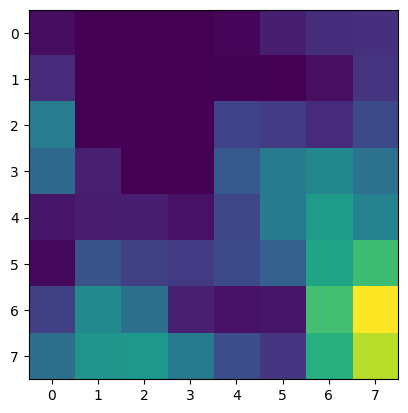

In [72]:
heatmap = make_gradcam_heatmap(val_data[0], feature_model, 'block7a_project_conv')
plt.imshow(cam)

In [37]:
import matplotlib as mpl

In [40]:
from IPython.display import Image, display

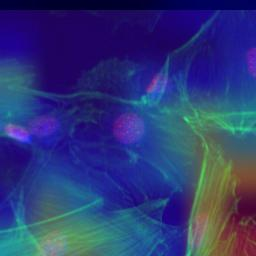

In [80]:
def save_and_display_gradcam(img, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    # img = keras.utils.load_img(img_path)
    # img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

img_array = val_data[0][0]
save_and_display_gradcam(img_array, heatmap, alpha=0.002)

In [31]:
# grads = tf.compat.v1.gradients(output, last_conv_layer.output)
# pooled_grads = tf.mean(grads, axis=(0, 1, 2))
# iterate = tf.function([model.input], [pooled_grads, last_conv_layer.output[0]])
# pooled_grads_value, conv_layer_output_value = iterate([x])

In [38]:
# import tensorflow.keras.backend as K

In [30]:
# tf.compat.v1.disable_eager_execution()
# grads = K.gradients(output, last_conv_layer.output)[0]
# pooled_grads = K.mean(grads, axis=(0, 1, 2))
# iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
# pooled_grads_value, conv_layer_output_value = iterate([x])